In [ ]:
# Data Mining Assignment: Wine Quality Dataset Analysis
## The goal is to perform a complete data preparation, reduction, and visualization workflow on the Wine Quality dataset to derive insights.
## Steps:
##1.  Setup: Load libraries and data.
##2.  Data Cleaning: Handle missing values, outliers, and feature scaling.
##3.  Feature Analysis: Analyze feature variance and correlations.
##4.  Dimensionality Reduction: Apply PCA and UMAP.
##5.  Visualization: Plot the reduced data to find patterns.
##6.  Reflection: Discuss interpretability and trade-offs.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap 

# Set some visual styles for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

# Loading the datasets from the UCI repository URLs
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

try:
    red_df = pd.read_csv(red_wine_url, sep=';')
    white_df = pd.read_csv(white_wine_url, sep=';')
    print("Datasets loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")


# Add a 'wine_type' column to distinguish them before combining
red_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

# Combine the two dataframes into a single one
df = pd.concat([red_df, white_df])

# Display the first few rows and basic info to confirm it's loaded correctly
print("\nFirst 5 rows of the combined dataset:")
print(df.head())
print("\nDataset Information:")
df.info()

C:\Users\iankw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Libraries imported successfully!
Datasets loaded successfully!

First 5 rows of the combined dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51

In [3]:
## Check for Missing Values
# 1.1 Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

if df.isnull().sum().sum() == 0:
    print("\nConclusion: There are no missing values in the dataset.")
else:
    print("\nConclusion: There are missing values that need to be handled.")

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Conclusion: There are no missing values in the dataset.


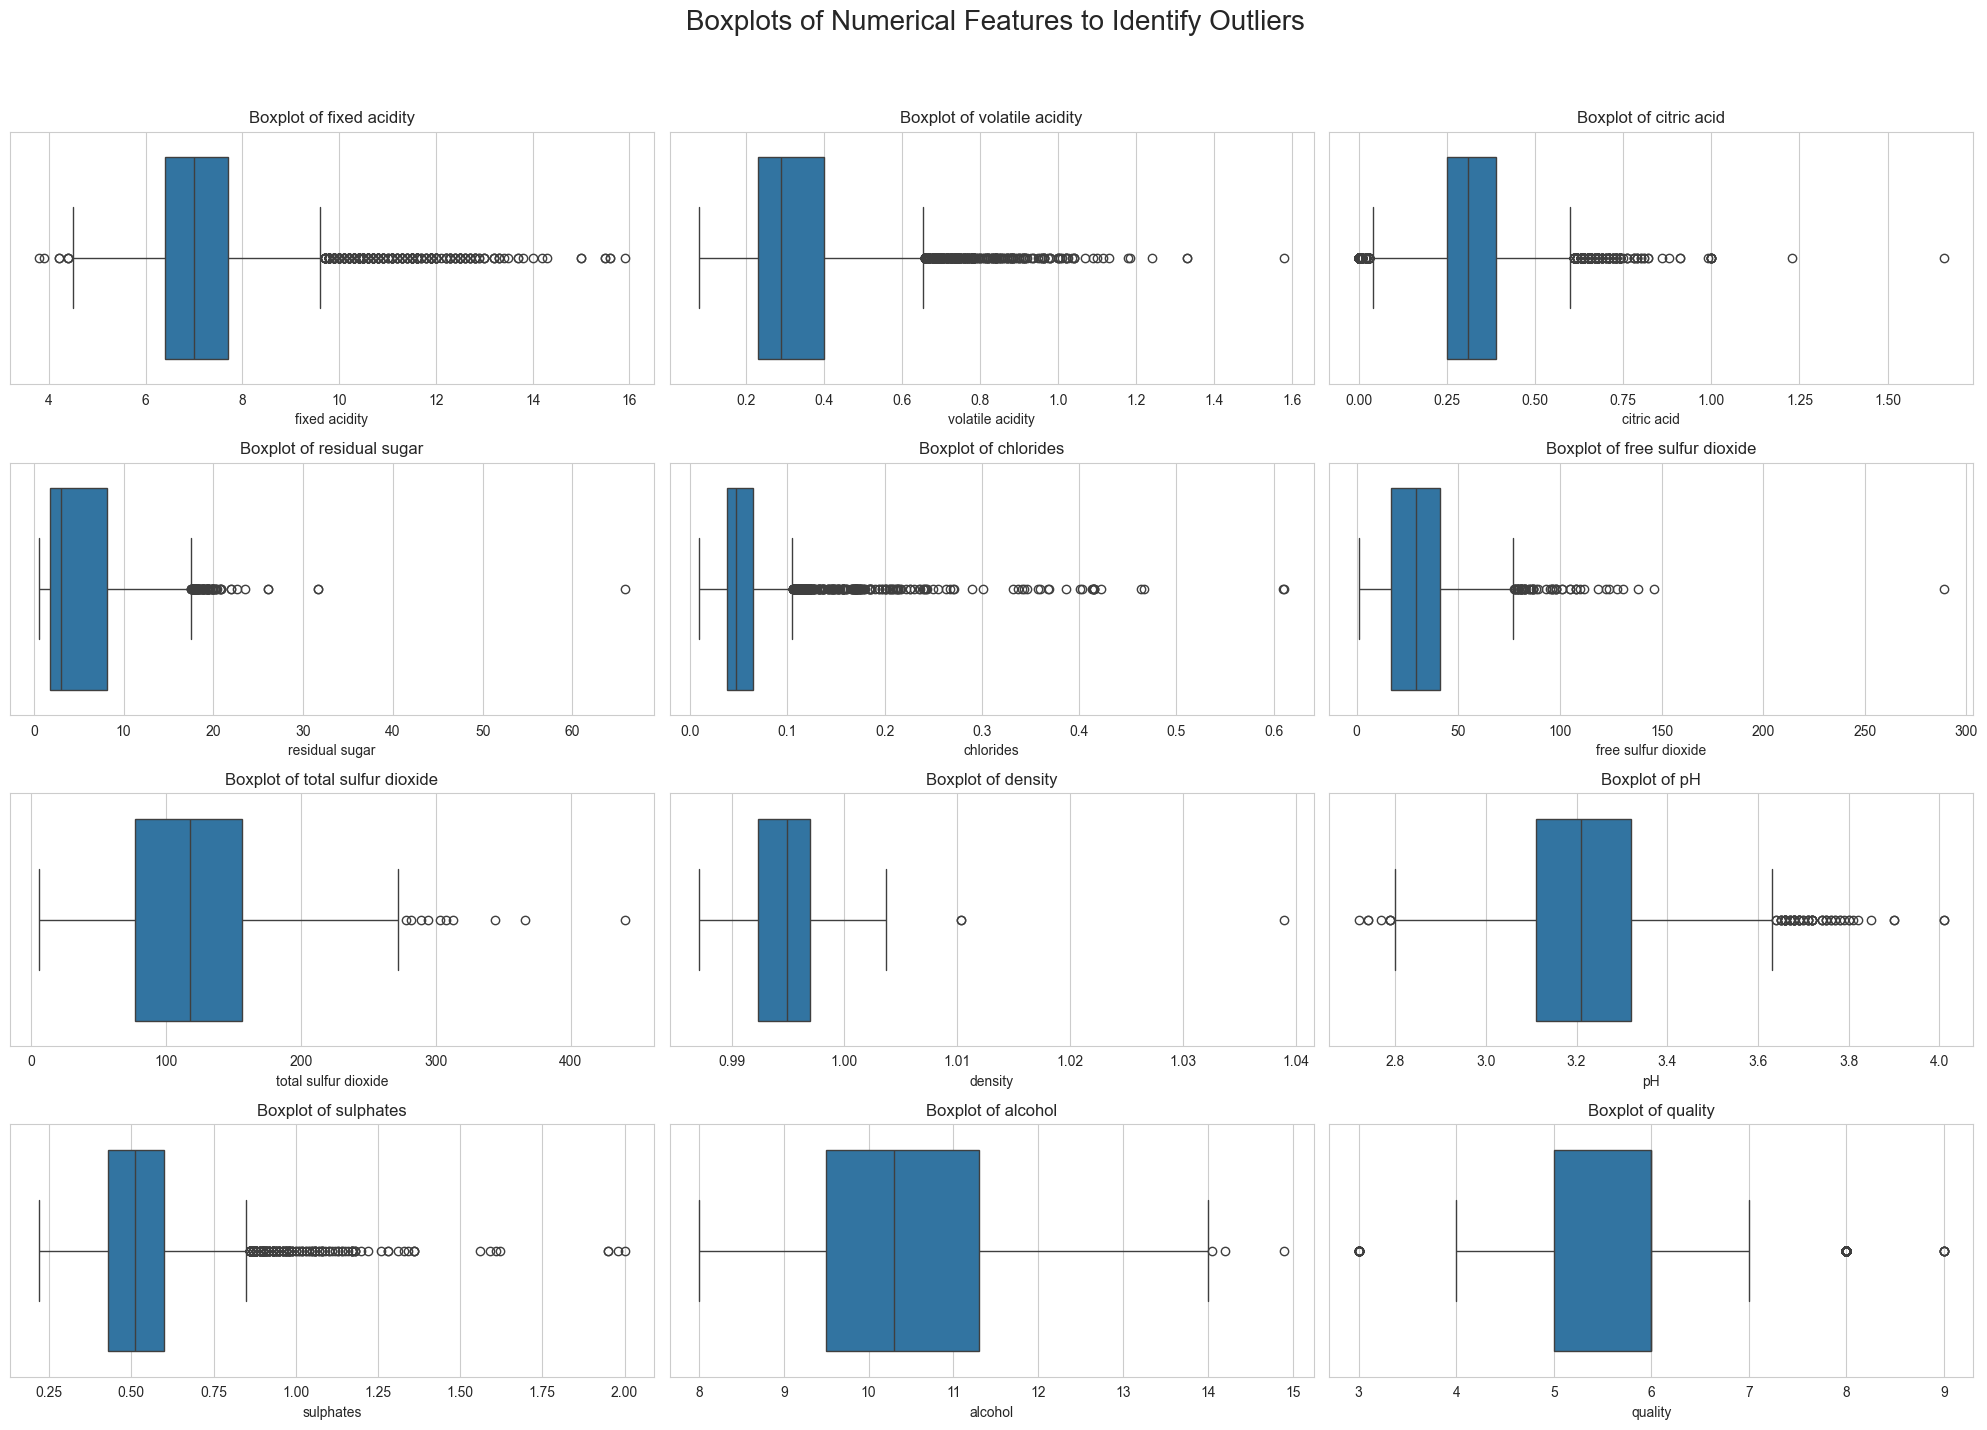

Conclusion: Yes, many features contain outliers (points outside the whiskers).
However, these are likely valid measurements for rare wines, so we will not remove them.
We will use a scaling method that is robust to their influence.


In [4]:
## Identify Outliers using Boxplots
# 1.2 Are there outliers or extreme values?
# We can visualize outliers using boxplots for all numerical features.

numerical_features = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(20, 15))
plt.suptitle("Boxplots of Numerical Features to Identify Outliers", fontsize=20)

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Conclusion: Yes, many features contain outliers (points outside the whiskers).")
print("However, these are likely valid measurements for rare wines, so we will not remove them.")
print("We will use a scaling method that is robust to their influence.")

In [5]:

##Feature Scaling
# 1.3 Do all variables have the same scale? If not, apply scaling.
print("Summary statistics of the original dataset:")
print(df.describe())
print("\nConclusion: The features are on vastly different scales (e.g., 'total sulfur dioxide' vs 'pH').")
print("We will apply StandardScaler to give each feature a mean of 0 and a standard deviation of 1.")

# Separate the features we want to scale from the categorical/target variables
features_to_scale = df.drop(columns=['quality', 'wine_type'])

# Apply StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_to_scale)

# Convert the scaled array back to a DataFrame for easier handling
features_scaled_df = pd.DataFrame(features_scaled, columns=features_to_scale.columns)

print("\nFirst 5 rows of the scaled data:")
print(features_scaled_df.head())

Summary statistics of the original dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min 

In [ ]:
## 2. Feature Analysis
##Here, we check for features with low variance and high correlation to see if any can be easily removed.
# 2.1 Which features have low variance?
# After StandardScaler, the variance of each feature is 1 by definition.
variances = features_scaled_df.var()
print("Variance of each feature after scaling:")
print(variances)
print("\nConclusion: No features should be removed based on low variance after scaling.")

Variance of each feature after scaling:
fixed acidity           1.000154
volatile acidity        1.000154
citric acid             1.000154
residual sugar          1.000154
chlorides               1.000154
free sulfur dioxide     1.000154
total sulfur dioxide    1.000154
density                 1.000154
pH                      1.000154
sulphates               1.000154
alcohol                 1.000154
dtype: float64

Conclusion: No features should be removed based on low variance after scaling.


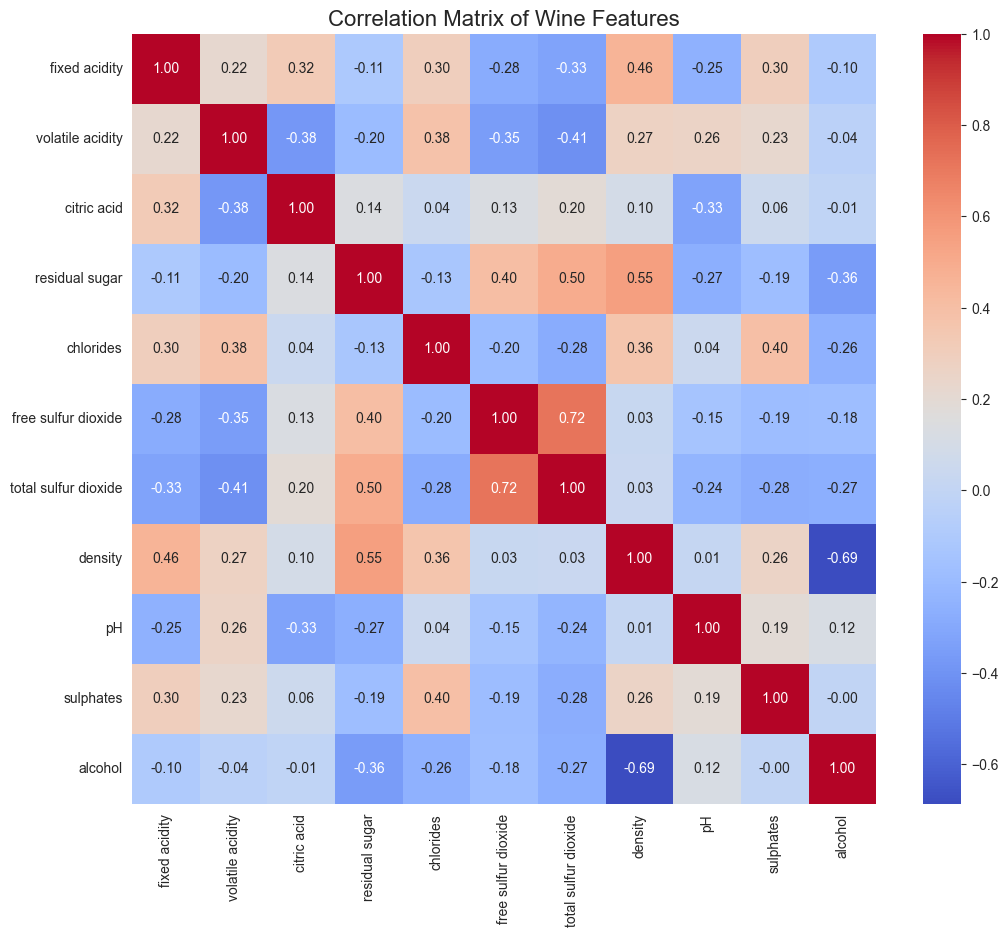

Conclusion: Yes, there are several highly correlated pairs (e.g., 'free sulfur dioxide' and 'total sulfur dioxide').
We could remove one from each pair, but for this exercise, we will let the dimensionality reduction algorithms handle this redundancy.


In [8]:

## Correlated Feature Check
# 2.2 Are there correlated features that can be reduced?
# We visualize the correlation matrix with a heatmap.
correlation_matrix = features_scaled_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features', fontsize=16)
plt.show()

print("Conclusion: Yes, there are several highly correlated pairs (e.g., 'free sulfur dioxide' and 'total sulfur dioxide').")
print("We could remove one from each pair, but for this exercise, we will let the dimensionality reduction algorithms handle this redundancy.")

In [ ]:
## 3. Dimensionality Reduction
##We will reduce the 11 features to 2 using two different methods: PCA (linear) and UMAP (non-linear).
# 3.1 Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])

# Add back the quality and wine_type from the original dataframe for visualization
# .values is used to ensure the indices align correctly
pca_df['quality'] = df['quality'].values
pca_df['wine_type'] = df['wine_type'].values

print("Explained variance by each component:", pca.explained_variance_ratio_)
print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_):.2f}")
print("\nFirst 5 rows of PCA results:")
print(pca_df.head())

Explained variance by each component: [0.2754426  0.22671146]
Total variance explained by 2 components: 0.50

First 5 rows of PCA results:
        PC1       PC2  quality wine_type
0 -3.205996  0.416523        5       red
1 -3.039051  1.107462        5       red
2 -3.071893  0.878964        5       red
3 -1.571262  2.112545        6       red
4 -3.205996  0.416523        5       red


In [11]:
# 3.2 Apply UMAP to reduce to 2 components
# UMAP is stochastic, so set a random_state for reproducible results.
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
features_umap = umap_reducer.fit_transform(features_scaled)

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(data=features_umap, columns=['UMAP1', 'UMAP2'])

# Add back the quality and wine_type for visualization
umap_df['quality'] = df['quality'].values
umap_df['wine_type'] = df['wine_type'].values

print("\nFirst 5 rows of UMAP results:")
print(umap_df.head())

C:\Users\iankw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



First 5 rows of UMAP results:
      UMAP1     UMAP2  quality wine_type
0 -0.657683  2.524427        5       red
1 -0.938513  1.989376        5       red
2 -0.870774  1.883467        5       red
3  0.179269 -1.839907        6       red
4 -0.689237  2.517332        5       red


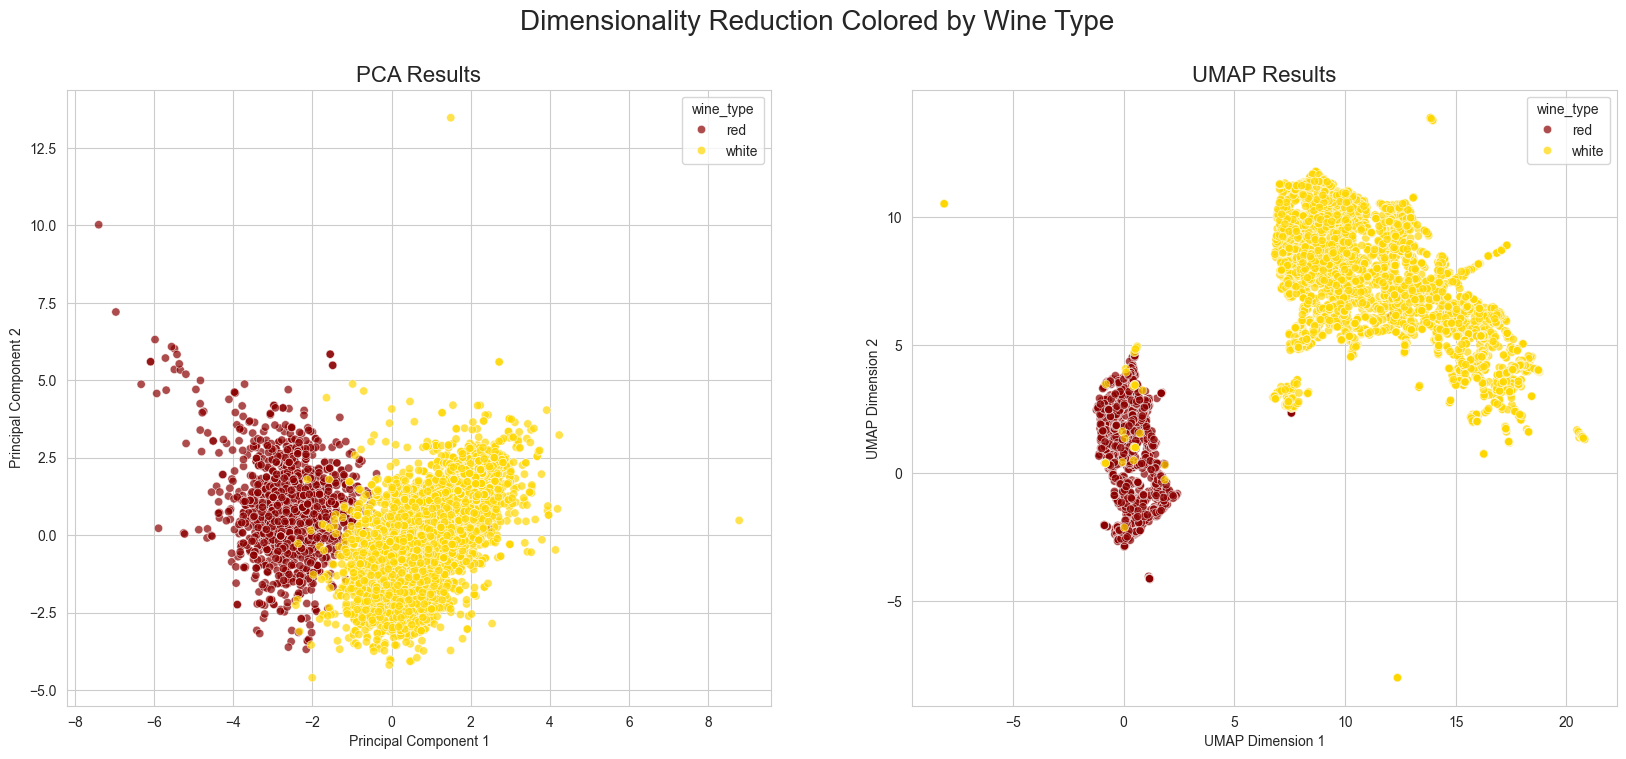

Observation: UMAP provides a much clearer separation between red and white wines, forming two distinct clusters.
PCA shows a general trend of separation but with significant overlap.


In [ ]:
## 4. Visualization
##Now we create 2D plots of the reduced datasets to compare the methods and observe patterns. We will color the plots by `wine_type` and `quality`.
# 4.1 Create 2D plots colored by Wine Type
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Dimensionality Reduction Colored by Wine Type', fontsize=20)

# PCA Plot
sns.scatterplot(ax=axes[0], data=pca_df, x='PC1', y='PC2', hue='wine_type', palette={'red': '#8B0000', 'white': '#FFD700'}, alpha=0.7)
axes[0].set_title('PCA Results', fontsize=16)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# UMAP Plot
sns.scatterplot(ax=axes[1], data=umap_df, x='UMAP1', y='UMAP2', hue='wine_type', palette={'red': '#8B0000', 'white': '#FFD700'}, alpha=0.7)
axes[1].set_title('UMAP Results', fontsize=16)
axes[1].set_xlabel('UMAP Dimension 1')
axes[1].set_ylabel('UMAP Dimension 2')

plt.show()
print("Observation: UMAP provides a much clearer separation between red and white wines, forming two distinct clusters.")
print("PCA shows a general trend of separation but with significant overlap.")

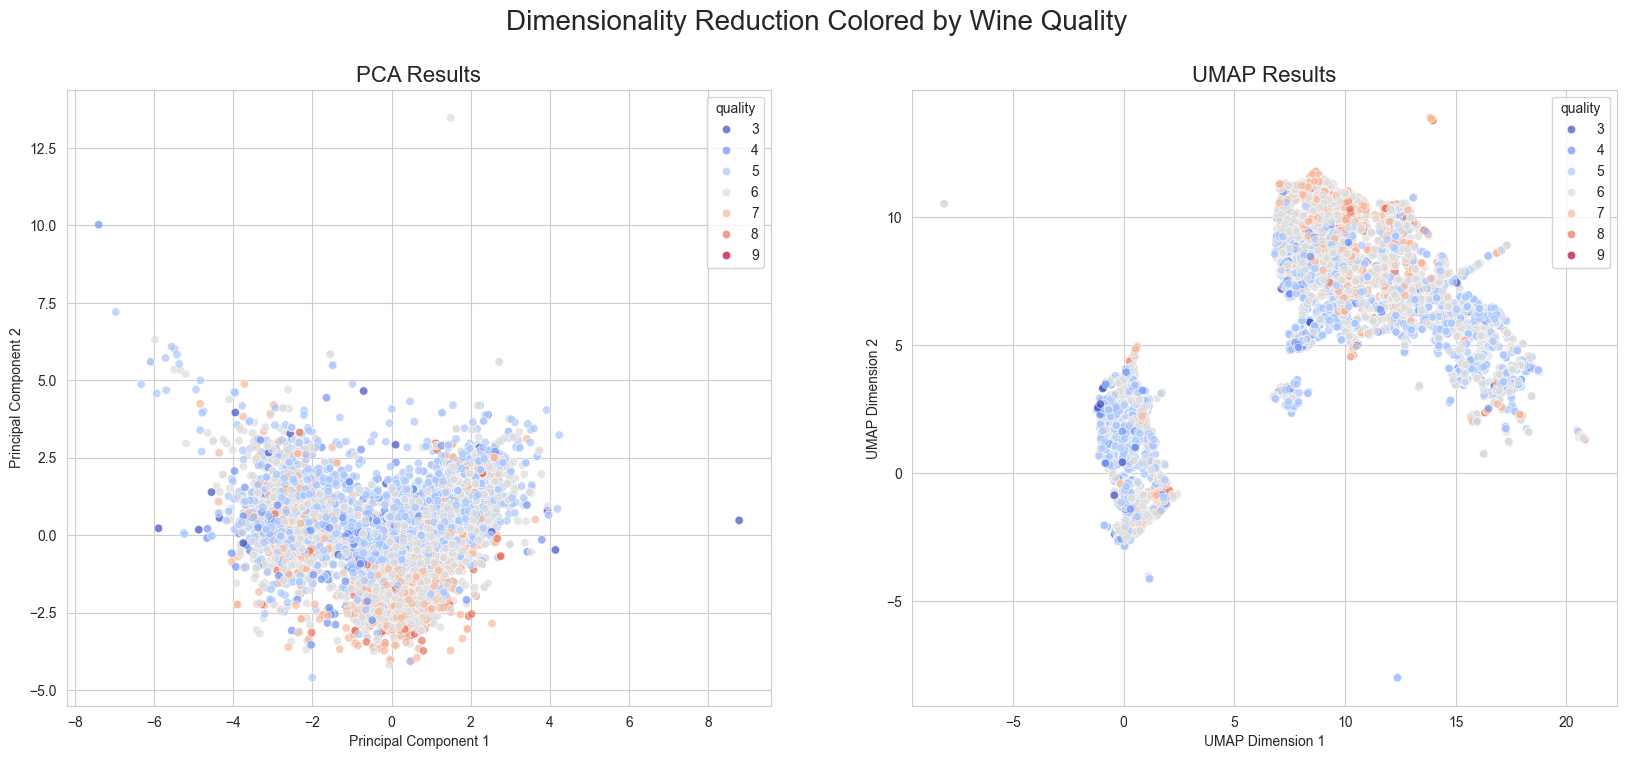

Observation: Neither method creates distinct clusters for wine quality.
However, a subtle gradient is visible, especially in the UMAP plot, suggesting some relationship between the features and quality, but it is not a simple one.


In [ ]:
# 4.2 Create 2D plots colored by Wine Quality
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Dimensionality Reduction Colored by Wine Quality', fontsize=20)
cmap = "coolwarm"

# PCA Plot
sns.scatterplot(ax=axes[0], data=pca_df, x='PC1', y='PC2', hue='quality', palette=cmap, alpha=0.7)
axes[0].set_title('PCA Results', fontsize=16)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# UMAP Plot
sns.scatterplot(ax=axes[1], data=umap_df, x='UMAP1', y='UMAP2', hue='quality', palette=cmap, alpha=0.7)
axes[1].set_title('UMAP Results', fontsize=16)
axes[1].set_xlabel('UMAP Dimension 1')
axes[1].set_ylabel('UMAP Dimension 2')

plt.show()

print("Observation: Neither method creates distinct clusters for wine quality.")
print("However, a subtle gradient is visible, especially in the UMAP plot, suggesting some relationship between the features and quality, but it is not a simple one.")

In [ ]:
## 5. Reflection

### How did dimensionality reduction affect interpretability?
##Original Features:** Were directly interpretable (e.g., pH, alcohol content).
##PCA Components (`PC1`, `PC2`):** Are mathematical combinations of *all* original features. They are hard to interpret directly, as `PC1` isn't a single chemical property but a weighted mix of them. We lose direct real-world meaning.
##UMAP Components (`UMAP1`, `UMAP2`):** Are even more abstract. They are coordinates in a new space that preserves the 'shape' or topology of the data but have no direct linear relationship back to the original features. Their sole purpose is visualization and clustering.

### What trade-offs did you face between accuracy and dimensionality?
##Information Loss vs. Simplicity:** We reduced 11 dimensions to 2. This is a significant loss of information (our PCA only captured ~46% of the variance). This lost detail could be critical for building a highly accurate predictive model.
##The Gain:** In return, we gained the ability to **visualize** the data. This allowed us to discover the primary insight from this analysis: that the chemical profiles of red and white wines are very distinct, while wine quality exists on a complex spectrum within those types. This trade-off was excellent for exploratory analysis but might be different if the goal was prediction.